In [1]:
import datajoint as dj
import numpy as np
import json
from subprocess import call
import yaml
import sys, os
import pandas as pd
import ray

sys.path.append('./lib')
from utilities import *
sys.path.append('../lib')
from utils import run

In [2]:
def setup_download_from_s3( rel_fp, recursive=True ):
    s3_fp = 's3://mousebrainatlas-data/'+rel_fp
    local_fp = os.environ['ROOT_DIR']+rel_fp

    if os.path.exists(local_fp):
        print('ALREADY DOWNLOADED FILE')
        return 
    
    if recursive:
        ! aws s3 cp --recursive $s3_fp $local_fp
    else:
        ! aws s3 cp $s3_fp $local_fp

In [11]:
setup_download_from_s3('CSHL_patch_samples_features_V6/MD594/')

download: s3://mousebrainatlas-data/CSHL_patch_samples_features_V6/MD594/10N/MD594_10N_negative.pkl to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples_features_V6/MD594/10N/MD594_10N_negative.pkl
download: s3://mousebrainatlas-data/CSHL_patch_samples_features_V6/MD594/10N/MD594_10N_positive.pkl to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples_features_V6/MD594/10N/MD594_10N_positive.pkl
download: s3://mousebrainatlas-data/CSHL_patch_samples_features_V6/MD594/12N/MD594_12N_positive.pkl to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples_features_V6/MD594/12N/MD594_12N_positive.pkl
download: s3://mousebrainatlas-data/CSHL_patch_samples_features_V6/MD594/4N/MD594_4N_negative.pkl to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples_features_V6/MD594/4N/MD594_4N_negative.pkl
download: s3://mousebrainatlas-data/CSHL_patch_samples_features_V6/MD594/3N/MD594_3N_positive.pkl to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samp

In [95]:
setup_download_from_s3('CSHL_data_processed/MD585/MD585_prep5_thumbnail/')

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/M

In [2]:
#credFiles= '/data/Github/VaultBrain/credFiles_aws.yaml'
credFiles= '/Users/kuiqian/Github/VaultBrain/credFiles.yaml'
dj.config['database.host'] = get_dj_creds(credFiles)['database.host']
dj.config['database.user'] = get_dj_creds(credFiles)['database.user']
dj.config['database.port'] = get_dj_creds(credFiles)['database.port']
dj.config['database.password'] = get_dj_creds(credFiles)['database.password']
dj.conn()

./lib/utilities.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  credFiles = yaml.load(open( credential_file_pointers,'r'))


Connecting kui@ucsd-demo-db.datajoint.io:3306


DataJoint connection (connected) kui@ucsd-demo-db.datajoint.io:3306

In [3]:
schema = dj.schema('kui_diffusionmap')
schema.spawn_missing_classes()

In [22]:
stack = 'MD589'
yaml_file = 'shape_params-aws.yaml'
#yaml_file = 'shape_params.yaml'
patch_file = 'CSHL_patches'
scripts_dir = os.environ['REPO_DIR']

In [5]:
Structure6.drop()

`kui_diffusionmap`.`structure6` (28 tuples)
`kui_diffusionmap`.`__process6` (28 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [6]:
@schema
class Structure6(dj.Manual):
    definition = """
    id  : int   # sequence
    --------
    structure       : char(10)    # name of mouse brain's structure
    positive_s3_fp  : varchar(200)  # (str) file path
    negative_s3_fp  : varchar(200)  # (str) file path
    """

In [7]:
paired_structures = ['5N', '6N', '7n', '7N', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', \
                     'SNC', 'SNR', '3N', '4N', 'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC'] #
all_structures = paired_structures + singular_structures
s3_fp = patch_file+'_features/'+stack+'/' #s3://mousebrainatlas-data/
print(s3_fp)

CSHL_patches_features/MD589/


In [8]:
n=0
for struc in all_structures:
    print("\nAdding "+struc+' to the database')
    Structure6.insert1(dict(id=n,
                           structure=struc,
                           positive_s3_fp=s3_fp+struc+'/'+stack+'_'+struc+'_positive.pkl',
                           negative_s3_fp=s3_fp+struc+'/'+stack+'_'+struc+'_negative.pkl',)
                      ,skip_duplicates=False)
    n+=1


Adding 5N to the database

Adding 6N to the database

Adding 7n to the database

Adding 7N to the database

Adding Amb to the database

Adding LC to the database

Adding LRt to the database

Adding Pn to the database

Adding Tz to the database

Adding VLL to the database

Adding RMC to the database

Adding SNC to the database

Adding SNR to the database

Adding 3N to the database

Adding 4N to the database

Adding Sp5I to the database

Adding Sp5O to the database

Adding Sp5C to the database

Adding PBG to the database

Adding 10N to the database

Adding VCA to the database

Adding VCP to the database

Adding DC to the database

Adding AP to the database

Adding 12N to the database

Adding RtTg to the database

Adding SC to the database

Adding IC to the database


In [9]:
structureTable = Structure6.fetch(as_dict=True)
strucDF = pd.DataFrame(structureTable)
strucDF

,id,structure,positive_s3_fp,negative_s3_fp
0,0,5N,CSHL_patches_features/MD589/5N/MD589_5N_positi...,CSHL_patches_features/MD589/5N/MD589_5N_negati...
1,1,6N,CSHL_patches_features/MD589/6N/MD589_6N_positi...,CSHL_patches_features/MD589/6N/MD589_6N_negati...
2,2,7n,CSHL_patches_features/MD589/7n/MD589_7n_positi...,CSHL_patches_features/MD589/7n/MD589_7n_negati...
3,3,7N,CSHL_patches_features/MD589/7N/MD589_7N_positi...,CSHL_patches_features/MD589/7N/MD589_7N_negati...
4,4,Amb,CSHL_patches_features/MD589/Amb/MD589_Amb_posi...,CSHL_patches_features/MD589/Amb/MD589_Amb_nega...
5,5,LC,CSHL_patches_features/MD589/LC/MD589_LC_positi...,CSHL_patches_features/MD589/LC/MD589_LC_negati...
6,6,LRt,CSHL_patches_features/MD589/LRt/MD589_LRt_posi...,CSHL_patches_features/MD589/LRt/MD589_LRt_nega...
7,7,Pn,CSHL_patches_features/MD589/Pn/MD589_Pn_positi...,CSHL_patches_features/MD589/Pn/MD589_Pn_negati...
8,8,Tz,CSHL_patches_features/MD589/Tz/MD589_Tz_positi...,CSHL_patches_features/MD589/Tz/MD589_Tz_negati...
9,9,VLL,CSHL_patches_features/MD589/VLL/MD589_VLL_posi...,CSHL_patches_features/MD589/VLL/MD589_VLL_nega...


In [10]:
Process6.drop()

NetworkXError: The node `kui_diffusionmap`.`__process6` is not in the graph.

In [11]:
@schema
class Process6(dj.Computed):
    definition="""
    -> Structure6
    -----
    size_positive_properties : int   #size of file
    size_negative_properties : int   #size of file
    """

    bucket = "mousebrainatlas-data"
    client = get_s3_client(credFiles)
    def make(self, key):
        struc = (Structure6 & key).fetch1('structure')
        print('populating for ', struc, end='\n')
        for state in ['positive', 'negative']:
            item_name = state+'_s3_fp'
            key_item = 'size_'+state+'_properties'
            s3_fp = (Structure6 & key).fetch1(item_name)
            try:
                report = self.client.stat_object(self.bucket, s3_fp)
                key[key_item] = int(report.size/1000)
            except:
                ! python3 $scripts_dir/Cell_generator.py $stack $struc $state $yaml_file $patch_file
                upload_fp = 's3://'+self.bucket+'/'+s3_fp
                pkl_out_file = os.environ['ROOT_DIR']+s3_fp
                ! aws s3 cp $pkl_out_file $upload_fp
                print(pkl_out_file,upload_fp)
                report = self.client.stat_object(self.bucket, s3_fp)
                key[key_item] = int(report.size / 1000)
        try:
            self.insert1(key)
        except:
            print('could not insert key=', key)


./lib/utilities.py:27: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  credFiles = yaml.load(open( credential_file_pointers,'r'))


In [12]:
Process6.populate()

populating for  5N
2019-07-02 05:30:55,731	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-02 05:30:55,734	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_05-30-55_731741_19256/logs.
2019-07-02 05:30:55,841	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:17987 to respond...
2019-07-02 05:30:55,949	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:31374 to respond...
2019-07-02 05:30:55,950	INFO services.py:806 -- Starting Redis shard with 10.0 GB max memory.
2019-07-02 05:30:55,961	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_05-30-55_731741_19256/logs.
2019-07-02 05:30:55,961	WARNING services.py:1294 -- Warning: Capping object memory store to 20.0GB. To increase this further, specify `object_store_mem

populating for  6N
2019-07-02 05:36:36,703	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-02 05:36:36,703	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_05-36-36_703464_18819/logs.
2019-07-02 05:36:36,809	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:10425 to respond...
2019-07-02 05:36:36,918	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:61527 to respond...
2019-07-02 05:36:36,919	INFO services.py:806 -- Starting Redis shard with 10.0 GB max memory.
2019-07-02 05:36:36,930	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_05-36-36_703464_18819/logs.
2019-07-02 05:36:36,931	WARNING services.py:1294 -- Warning: Capping object memory store to 20.0GB. To increase this further, specify `object_store_mem

(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/162_7.tif std= 9.208101225745391 too blank
(pid=35510) 7n_positive 81 80 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/253_5.tif std= 8.801635762895184 too blank
(pid=35510) 7n_positive 91 90 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/153_0.tif std= 8.238259619117889 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/163_5.tif std= 9.541213693371379 too blank
(pid=35510) 7n_positive 101 100 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/284_9.tif std= 9.682229809977786 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/154_5.tif std= 6.706864757772185 too blank
(pid=35510) 7n_positive 111 110 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/313_4.tif std= 8.893286338468352 too blank
(

(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/161_8.tif std= 9.225603082595327 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/164_6.tif std= 9.365153556112809 too blank
(pid=35510) 7n_positive 311 310 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/188_9.tif std= 9.804948101526024 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/170_6.tif std= 6.58209334901853 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/310_7.tif std= 8.704716783452007 too blank
(pid=35510) 7n_positive 321 320 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/201_2.tif std= 9.896569333511557 too blank
(pid=35510) 7n_positive 331 330 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/174_3.tif std= 8.130816638469247 too blank
(pid=35510) image /data/BstemAtlasDat

(pid=35510) 7n_positive 561 560 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/185_2.tif std= 9.832832817037731 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/159_5.tif std= 8.878813314660235 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/198_5.tif std= 8.650959893336221 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/164_7.tif std= 8.688396240163826 too blank
(pid=35510) 7n_positive 571 570 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/268_5.tif std= 8.918063884683823 too blank
(pid=35510) 7n_positive 581 580 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/158_0.tif std= 4.927022214544689 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/176_9.tif std= 6.44385492079012 too blank
(pid=35510) 7n_positive 591 590 / 100

(pid=35510) 7n_positive 801 800 / 1000
(pid=35510) 7n_positive 811 810 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/152_1.tif std= 8.590700678929357 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/262_4.tif std= 9.60131965664948 too blank
(pid=35510) 7n_positive 821 820 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/153_9.tif std= 7.952966391459933 too blank
(pid=35510) 7n_positive 831 830 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/193_6.tif std= 9.246793629993974 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/275_4.tif std= 9.172366645521391 too blank
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/164_5.tif std= 9.47696913164162 too blank
(pid=35510) 7n_positive 841 840 / 1000
(pid=35510) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n/293

(pid=36587) 7n_negative 61 60 / 1000
(pid=36587) 7n_negative 71 70 / 1000
(pid=36587) 7n_negative 81 80 / 1000
(pid=36587) 7n_negative 91 90 / 1000
(pid=36587) 7n_negative 101 100 / 1000
(pid=36587) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7n_surround_500um_noclass/158_2.tif std= 9.984532314130055 too blank
(pid=36587) 7n_negative 111 110 / 1000
(pid=36587) 7n_negative 121 120 / 1000
(pid=36587) 7n_negative 131 130 / 1000
(pid=36587) 7n_negative 141 140 / 1000
(pid=36587) 7n_negative 151 150 / 1000
(pid=36587) 7n_negative 161 160 / 1000
(pid=36587) 7n_negative 171 170 / 1000
(pid=36587) 7n_negative 181 180 / 1000
(pid=36587) 7n_negative 191 190 / 1000
(pid=36587) 7n_negative 201 200 / 1000
(pid=36587) 7n_negative 211 210 / 1000
(pid=36587) 7n_negative 221 220 / 1000
(pid=36587) 7n_negative 231 230 / 1000
(pid=36587) 7n_negative 241 240 / 1000
(pid=36587) 7n_negative 251 250 / 1000
(pid=36587) 7n_negative 261 260 / 1000
(pid=36587) 7n_negative 271 270 / 1000
(pid=3

(pid=9429) 7N_positive 191 190 / 884
(pid=9429) 7N_positive 201 200 / 884
(pid=9429) 7N_positive 211 210 / 884
(pid=9429) 7N_positive 221 220 / 884
(pid=9429) 7N_positive 231 230 / 884
(pid=9429) 7N_positive 241 240 / 884
(pid=9429) 7N_positive 251 250 / 884
(pid=9429) 7N_positive 261 260 / 884
(pid=9429) 7N_positive 271 270 / 884
(pid=9429) 7N_positive 281 280 / 884
(pid=9429) 7N_positive 291 290 / 884
(pid=9429) 7N_positive 301 300 / 884
(pid=9429) 7N_positive 311 310 / 884
(pid=9429) 7N_positive 321 320 / 884
(pid=9429) 7N_positive 331 330 / 884
(pid=9429) 7N_positive 341 340 / 884
(pid=9429) 7N_positive 351 350 / 884
(pid=9429) 7N_positive 361 360 / 884
(pid=9429) 7N_positive 371 370 / 884
(pid=9429) 7N_positive 381 380 / 884
(pid=9429) 7N_positive 391 390 / 884
(pid=9429) 7N_positive 401 400 / 884
(pid=9429) 7N_positive 411 410 / 884
(pid=9429) 7N_positive 421 420 / 884
(pid=9429) 7N_positive 431 430 / 884
(pid=9429) 7N_positive 441 440 / 884
(pid=9429) 7N_positive 451 450 / 884
(

(pid=9308) 7N_negative 531 530 / 890
(pid=9308) 7N_negative 541 540 / 890
(pid=9308) 7N_negative 551 550 / 890
(pid=9308) 7N_negative 561 560 / 890
(pid=9308) 7N_negative 571 570 / 890
(pid=9308) 7N_negative 581 580 / 890
(pid=9308) 7N_negative 591 590 / 890
(pid=9308) 7N_negative 601 600 / 890
(pid=9308) 7N_negative 611 610 / 890
(pid=9308) 7N_negative 621 620 / 890
(pid=9308) 7N_negative 631 630 / 890
(pid=9308) 7N_negative 641 640 / 890
(pid=9308) 7N_negative 651 650 / 890
(pid=9308) 7N_negative 661 660 / 890
(pid=9308) 7N_negative 671 670 / 890
(pid=9308) 7N_negative 681 680 / 890
(pid=9308) 7N_negative 691 690 / 890
(pid=9308) 7N_negative 701 700 / 890
(pid=9308) 7N_negative 711 710 / 890
(pid=9308) 7N_negative 721 720 / 890
(pid=9308) 7N_negative 731 730 / 890
(pid=9308) 7N_negative 741 740 / 890
(pid=9308) 7N_negative 751 750 / 890
(pid=9308) 7N_negative 761 760 / 890
(pid=9308) 7N_negative 771 770 / 890
(pid=9308) 7N_negative 781 780 / 890
(pid=9308) 7N_negative 791 790 / 890
(

/data/Github/shapeology_code/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load(open(yamlFile,'r'))
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/
(pid=4398) LC_positive 1 0 / 240
(pid=4398) LC_positive 11 10 / 240
(pid=4398) LC_positive 21 20 / 240
(pid=4398) LC_positive 31 30 / 240
(pid=4398) LC_positive 41 40 / 240
(pid=4398) LC_positive 51 50 / 240
(pid=4398) LC_positive 61 60 / 240
(pid=4398) LC_positive 71 70 / 240
(pid=4398) LC_positive 81 80 / 240
(pid=4398) LC_positive 91 90 / 240
(pid=4398) LC_positive 101 100 / 240
(pid=4398) LC_positive 111 110 / 240
(pid=4398) LC_positive 121 120 / 240
(pid=4398) LC_positive 131 130 / 240
(pid=4398) LC_positive 141 140 / 240
(pid=4398) LC_positive 151 150 / 240
(pid=4398) LC_positive 161 160 / 240
(pid=4398) LC_positive 171 170 / 240
(pid=4398) LC_positive 181 180 / 2

(pid=28769) LRt_positive 171 170 / 760
(pid=28769) LRt_positive 181 180 / 760
(pid=28769) LRt_positive 191 190 / 760
(pid=28769) LRt_positive 201 200 / 760
(pid=28769) LRt_positive 211 210 / 760
(pid=28769) LRt_positive 221 220 / 760
(pid=28769) LRt_positive 231 230 / 760
(pid=28769) LRt_positive 241 240 / 760
(pid=28769) LRt_positive 251 250 / 760
(pid=28769) LRt_positive 261 260 / 760
(pid=28769) LRt_positive 271 270 / 760
(pid=28769) LRt_positive 281 280 / 760
(pid=28769) LRt_positive 291 290 / 760
(pid=28769) LRt_positive 301 300 / 760
(pid=28769) LRt_positive 311 310 / 760
(pid=28769) LRt_positive 321 320 / 760
(pid=28769) LRt_positive 331 330 / 760
(pid=28769) LRt_positive 341 340 / 760
(pid=28769) LRt_positive 351 350 / 760
(pid=28769) LRt_positive 361 360 / 760
(pid=28769) LRt_positive 371 370 / 760
(pid=28769) LRt_positive 381 380 / 760
(pid=28769) LRt_positive 391 390 / 760
(pid=28769) LRt_positive 401 400 / 760
(pid=28769) LRt_positive 411 410 / 760
(pid=28769) LRt_positive 

(pid=15149) LRt_negative 561 560 / 760
(pid=15149) LRt_negative 571 570 / 760
(pid=15149) LRt_negative 581 580 / 760
(pid=15149) LRt_negative 591 590 / 760
(pid=15149) LRt_negative 601 600 / 760
(pid=15149) LRt_negative 611 610 / 760
(pid=15149) LRt_negative 621 620 / 760
(pid=15149) LRt_negative 631 630 / 760
(pid=15149) LRt_negative 641 640 / 760
(pid=15149) LRt_negative 651 650 / 760
(pid=15149) LRt_negative 661 660 / 760
(pid=15149) LRt_negative 671 670 / 760
(pid=15149) LRt_negative 681 680 / 760
(pid=15149) LRt_negative 691 690 / 760
(pid=15149) LRt_negative 701 700 / 760
(pid=15149) LRt_negative 711 710 / 760
(pid=15149) LRt_negative 721 720 / 760
(pid=15149) LRt_negative 731 730 / 760
(pid=15149) LRt_negative 741 740 / 760
(pid=15149) LRt_negative 751 750 / 760
(pid=15149) LRt_negative 760
(pid=15149) LRt_negative finished in 284.6 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/LRt/MD589_LRt_negative.pkl to s3://mousebrainatlas-data/CSHL

/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Pn/MD589_Pn_negative.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/Pn/MD589_Pn_negative.pkl
populating for  Tz
2019-07-02 06:26:05,787	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-02 06:26:05,788	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_06-26-05_787819_20334/logs.
2019-07-02 06:26:05,894	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:27235 to respond...
2019-07-02 06:26:06,004	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:43841 to respond...
2019-07-02 06:26:06,004	INFO services.py:806 -- Starting Redis shard with 10.0 GB max memory.
2019-07-02 06:26:06,016	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_06-26-05_

(pid=8923) Tz_negative 401 400 / 500
(pid=8923) Tz_negative 411 410 / 500
(pid=8923) Tz_negative 421 420 / 500
(pid=8923) Tz_negative 431 430 / 500
(pid=8923) Tz_negative 441 440 / 500
(pid=8923) Tz_negative 451 450 / 500
(pid=8923) Tz_negative 461 460 / 500
(pid=8923) Tz_negative 471 470 / 500
(pid=8923) Tz_negative 481 480 / 500
(pid=8923) Tz_negative 491 490 / 500
(pid=8923) Tz_negative 500
(pid=8923) Tz_negative finished in 178.0 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Tz/MD589_Tz_negative.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/Tz/MD589_Tz_negative.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Tz/MD589_Tz_negative.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/Tz/MD589_Tz_negative.pkl
populating for  VLL
2019-07-02 06:32:22,051	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[d

(pid=7401) VLL_negative 61 60 / 690
(pid=7401) VLL_negative 71 70 / 690
(pid=7401) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_500um_noclass/167_0.tif std= 8.688506726459993 too blank
(pid=7401) VLL_negative 81 80 / 690
(pid=7401) VLL_negative 91 90 / 690
(pid=7401) VLL_negative 101 100 / 690
(pid=7401) VLL_negative 111 110 / 690
(pid=7401) VLL_negative 121 120 / 690
(pid=7401) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_500um_noclass/323_6.tif std= 6.930243599624744 too blank
(pid=7401) VLL_negative 131 130 / 690
(pid=7401) VLL_negative 141 140 / 690
(pid=7401) VLL_negative 151 150 / 690
(pid=7401) VLL_negative 161 160 / 690
(pid=7401) VLL_negative 171 170 / 690
(pid=7401) VLL_negative 181 180 / 690
(pid=7401) VLL_negative 191 190 / 690
(pid=7401) VLL_negative 201 200 / 690
(pid=7401) VLL_negative 211 210 / 690
(pid=7401) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_500um_noclass/158_4.tif s

(pid=14821) RMC_positive 441 440 / 570
(pid=14821) RMC_positive 451 450 / 570
(pid=14821) RMC_positive 461 460 / 570
(pid=14821) RMC_positive 471 470 / 570
(pid=14821) RMC_positive 481 480 / 570
(pid=14821) RMC_positive 491 490 / 570
(pid=14821) RMC_positive 501 500 / 570
(pid=14821) RMC_positive 511 510 / 570
(pid=14821) RMC_positive 521 520 / 570
(pid=14821) RMC_positive 531 530 / 570
(pid=14821) RMC_positive 541 540 / 570
(pid=14821) RMC_positive 551 550 / 570
(pid=14821) RMC_positive 561 560 / 570
(pid=14821) RMC_positive 570
(pid=14821) RMC_positive finished in 219.0 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/RMC/MD589_RMC_positive.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/RMC/MD589_RMC_positive.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/RMC/MD589_RMC_positive.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/RMC/MD589_RMC_positive.pkl
2019-07-02 06:44:46,379	WARNING worker.py:1331 -

(pid=9570) SNC_positive 141 140 / 785
(pid=9570) SNC_positive 151 150 / 785
(pid=9570) SNC_positive 161 160 / 785
(pid=9570) SNC_positive 171 170 / 785
(pid=9570) SNC_positive 181 180 / 785
(pid=9570) SNC_positive 191 190 / 785
(pid=9570) SNC_positive 201 200 / 785
(pid=9570) SNC_positive 211 210 / 785
(pid=9570) SNC_positive 221 220 / 785
(pid=9570) SNC_positive 231 230 / 785
(pid=9570) SNC_positive 241 240 / 785
(pid=9570) SNC_positive 251 250 / 785
(pid=9570) SNC_positive 261 260 / 785
(pid=9570) SNC_positive 271 270 / 785
(pid=9570) SNC_positive 281 280 / 785
(pid=9570) SNC_positive 291 290 / 785
(pid=9570) SNC_positive 301 300 / 785
(pid=9570) SNC_positive 311 310 / 785
(pid=9570) SNC_positive 321 320 / 785
(pid=9570) SNC_positive 331 330 / 785
(pid=9570) SNC_positive 341 340 / 785
(pid=9570) SNC_positive 351 350 / 785
(pid=9570) SNC_positive 361 360 / 785
(pid=9570) SNC_positive 371 370 / 785
(pid=9570) SNC_positive 381 380 / 785
(pid=9570) SNC_positive 391 390 / 785
(pid=9570) S

(pid=34837) SNC_negative 551 550 / 830
(pid=34837) SNC_negative 561 560 / 830
(pid=34837) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SNC_surround_500um_noclass/289_2.tif std= 2.8869926671392117 too blank
(pid=34837) SNC_negative 571 570 / 830
(pid=34837) SNC_negative 581 580 / 830
(pid=34837) SNC_negative 591 590 / 830
(pid=34837) SNC_negative 601 600 / 830
(pid=34837) SNC_negative 611 610 / 830
(pid=34837) SNC_negative 621 620 / 830
(pid=34837) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SNC_surround_500um_noclass/188_4.tif std= 8.241163635383915 too blank
(pid=34837) SNC_negative 631 630 / 830
(pid=34837) SNC_negative 641 640 / 830
(pid=34837) SNC_negative 651 650 / 830
(pid=34837) SNC_negative 661 660 / 830
(pid=34837) SNC_negative 671 670 / 830
(pid=34837) SNC_negative 681 680 / 830
(pid=34837) SNC_negative 691 690 / 830
(pid=34837) SNC_negative 701 700 / 830
(pid=34837) SNC_negative 711 710 / 830
(pid=34837) SNC_negative 721 720 / 830
(pid=34

(pid=23038) SNR_positive 821 820 / 1000
(pid=23038) SNR_positive 831 830 / 1000
(pid=23038) SNR_positive 841 840 / 1000
(pid=23038) SNR_positive 851 850 / 1000
(pid=23038) SNR_positive 861 860 / 1000
(pid=23038) SNR_positive 871 870 / 1000
(pid=23038) SNR_positive 881 880 / 1000
(pid=23038) SNR_positive 891 890 / 1000
(pid=23038) SNR_positive 901 900 / 1000
(pid=23038) SNR_positive 911 910 / 1000
(pid=23038) SNR_positive 921 920 / 1000
(pid=23038) SNR_positive 931 930 / 1000
(pid=23038) SNR_positive 941 940 / 1000
(pid=23038) SNR_positive 951 950 / 1000
(pid=23038) SNR_positive 961 960 / 1000
(pid=23038) SNR_positive 971 970 / 1000
(pid=23038) SNR_positive 981 980 / 1000
(pid=23038) SNR_positive 991 990 / 1000
(pid=23038) SNR_positive 1000
(pid=23038) SNR_positive finished in 374.6 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/SNR/MD589_SNR_positive.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/SNR/MD589_SNR_positive.pkl
/data/Bs

(pid=34401) SNR_negative 930 930 / 1000
(pid=34401) SNR_negative 940 940 / 1000
(pid=34401) SNR_negative 950 950 / 1000
(pid=34401) SNR_negative 960 960 / 1000
(pid=34401) SNR_negative 970 970 / 1000
(pid=34401) SNR_negative 980 980 / 1000
(pid=34401) SNR_negative 990 990 / 1000
(pid=34401) SNR_negative 999
(pid=34401) SNR_negative finished in 364.5 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/SNR/MD589_SNR_negative.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/SNR/MD589_SNR_negative.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/SNR/MD589_SNR_negative.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/SNR/MD589_SNR_negative.pkl
populating for  3N
2019-07-02 07:11:10,675	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-02 07:11:10,675	INFO n

/data/Github/shapeology_code/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load(open(yamlFile,'r'))
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/
(pid=31481) 4N_positive 1 0 / 45
(pid=31481) 4N_positive 11 10 / 45
(pid=31481) 4N_positive 21 20 / 45
(pid=31481) 4N_positive 31 30 / 45
(pid=31481) 4N_positive 41 40 / 45
(pid=31481) 4N_positive 45
(pid=31481) 4N_positive finished in  17.6 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/4N/MD589_4N_positive.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/4N/MD589_4N_positive.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/4N/MD589_4N_positive.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/4N/MD589_4N_positive.pkl
2019-07-02 07:14:46,423	WARNING worker.py:1331 -- WARNING: Not updating

(pid=20663) Sp5I_positive 611 610 / 730
(pid=20663) Sp5I_positive 621 620 / 730
(pid=20663) Sp5I_positive 631 630 / 730
(pid=20663) Sp5I_positive 641 640 / 730
(pid=20663) Sp5I_positive 651 650 / 730
(pid=20663) Sp5I_positive 661 660 / 730
(pid=20663) Sp5I_positive 671 670 / 730
(pid=20663) Sp5I_positive 681 680 / 730
(pid=20663) Sp5I_positive 691 690 / 730
(pid=20663) Sp5I_positive 701 700 / 730
(pid=20663) Sp5I_positive 711 710 / 730
(pid=20663) Sp5I_positive 721 720 / 730
(pid=20663) Sp5I_positive 730
(pid=20663) Sp5I_positive finished in 283.4 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Sp5I/MD589_Sp5I_positive.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/Sp5I/MD589_Sp5I_positive.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Sp5I/MD589_Sp5I_positive.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/Sp5I/MD589_Sp5I_positive.pkl
2019-07-02 07:20:25,895	WARNING worker.py:1331 -- WARNING: Not up

2019-07-02 07:24:46,387	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:59616 to respond...
2019-07-02 07:24:46,388	INFO services.py:806 -- Starting Redis shard with 10.0 GB max memory.
2019-07-02 07:24:46,400	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_07-24-46_171649_13867/logs.
2019-07-02 07:24:46,401	WARNING services.py:1294 -- Warning: Capping object memory store to 20.0GB. To increase this further, specify `object_store_memory` when calling ray.init() or ray start.
2019-07-02 07:24:46,401	INFO services.py:1442 -- Starting the Plasma object store with 20.0 GB memory using /dev/shm.
/data/Github/shapeology_code/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load(open(yamlFile,'r'))
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/
(pid=13988) Sp5O_

(pid=24211) Sp5O_negative 261 260 / 680
(pid=24211) Sp5O_negative 271 270 / 680
(pid=24211) Sp5O_negative 281 280 / 680
(pid=24211) Sp5O_negative 291 290 / 680
(pid=24211) Sp5O_negative 301 300 / 680
(pid=24211) Sp5O_negative 311 310 / 680
(pid=24211) Sp5O_negative 321 320 / 680
(pid=24211) Sp5O_negative 331 330 / 680
(pid=24211) Sp5O_negative 341 340 / 680
(pid=24211) Sp5O_negative 351 350 / 680
(pid=24211) Sp5O_negative 361 360 / 680
(pid=24211) Sp5O_negative 371 370 / 680
(pid=24211) Sp5O_negative 381 380 / 680
(pid=24211) Sp5O_negative 391 390 / 680
(pid=24211) Sp5O_negative 401 400 / 680
(pid=24211) Sp5O_negative 411 410 / 680
(pid=24211) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Sp5O_surround_500um_noclass/122_1.tif std= 9.59601733541261 too blank
(pid=24211) Sp5O_negative 421 420 / 680
(pid=24211) Sp5O_negative 431 430 / 680
(pid=24211) Sp5O_negative 441 440 / 680
(pid=24211) Sp5O_negative 451 450 / 680
(pid=24211) image /data/BstemAtlasDataBackup/ucsd_brain

(pid=27798) Sp5C_positive 631 630 / 1000
(pid=27798) Sp5C_positive 641 640 / 1000
(pid=27798) Sp5C_positive 651 650 / 1000
(pid=27798) Sp5C_positive 661 660 / 1000
(pid=27798) Sp5C_positive 671 670 / 1000
(pid=27798) Sp5C_positive 681 680 / 1000
(pid=27798) Sp5C_positive 691 690 / 1000
(pid=27798) Sp5C_positive 701 700 / 1000
(pid=27798) Sp5C_positive 711 710 / 1000
(pid=27798) Sp5C_positive 721 720 / 1000
(pid=27798) Sp5C_positive 731 730 / 1000
(pid=27798) Sp5C_positive 741 740 / 1000
(pid=27798) Sp5C_positive 751 750 / 1000
(pid=27798) Sp5C_positive 761 760 / 1000
(pid=27798) Sp5C_positive 771 770 / 1000
(pid=27798) Sp5C_positive 781 780 / 1000
(pid=27798) Sp5C_positive 791 790 / 1000
(pid=27798) Sp5C_positive 801 800 / 1000
(pid=27798) Sp5C_positive 811 810 / 1000
(pid=27798) Sp5C_positive 821 820 / 1000
(pid=27798) Sp5C_positive 831 830 / 1000
(pid=27798) Sp5C_positive 841 840 / 1000
(pid=27798) Sp5C_positive 851 850 / 1000
(pid=27798) Sp5C_positive 861 860 / 1000
(pid=27798) Sp5C

(pid=7277) Sp5C_negative 811 810 / 1000
(pid=7277) Sp5C_negative 821 820 / 1000
(pid=7277) Sp5C_negative 831 830 / 1000
(pid=7277) Sp5C_negative 841 840 / 1000
(pid=7277) Sp5C_negative 851 850 / 1000
(pid=7277) Sp5C_negative 861 860 / 1000
(pid=7277) Sp5C_negative 871 870 / 1000
(pid=7277) Sp5C_negative 881 880 / 1000
(pid=7277) Sp5C_negative 891 890 / 1000
(pid=7277) Sp5C_negative 901 900 / 1000
(pid=7277) Sp5C_negative 911 910 / 1000
(pid=7277) Sp5C_negative 921 920 / 1000
(pid=7277) Sp5C_negative 931 930 / 1000
(pid=7277) Sp5C_negative 941 940 / 1000
(pid=7277) Sp5C_negative 951 950 / 1000
(pid=7277) Sp5C_negative 961 960 / 1000
(pid=7277) Sp5C_negative 971 970 / 1000
(pid=7277) Sp5C_negative 981 980 / 1000
(pid=7277) Sp5C_negative 991 990 / 1000
(pid=7277) Sp5C_negative 1000
(pid=7277) Sp5C_negative finished in 373.6 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/Sp5C/MD589_Sp5C_negative.pkl to s3://mousebrainatlas-data/CSHL_patches_features

2019-07-02 07:49:10,626	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:44968 to respond...
2019-07-02 07:49:10,736	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:63086 to respond...
2019-07-02 07:49:10,737	INFO services.py:806 -- Starting Redis shard with 10.0 GB max memory.
2019-07-02 07:49:10,749	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_07-49-10_519697_6534/logs.
2019-07-02 07:49:10,750	WARNING services.py:1294 -- Warning: Capping object memory store to 20.0GB. To increase this further, specify `object_store_memory` when calling ray.init() or ray start.
2019-07-02 07:49:10,750	INFO services.py:1442 -- Starting the Plasma object store with 20.0 GB memory using /dev/shm.
/data/Github/shapeology_code/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load

(pid=22540) 10N_negative 421 420 / 460
(pid=22540) 10N_negative 431 430 / 460
(pid=22540) 10N_negative 441 440 / 460
(pid=22540) 10N_negative 451 450 / 460
(pid=22540) 10N_negative 460
(pid=22540) 10N_negative finished in 169.6 seconds
upload: ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/10N/MD589_10N_negative.pkl to s3://mousebrainatlas-data/CSHL_patches_features/MD589/10N/MD589_10N_negative.pkl
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/10N/MD589_10N_negative.pkl s3://mousebrainatlas-data/CSHL_patches_features/MD589/10N/MD589_10N_negative.pkl
populating for  VCA
2019-07-02 07:54:49,541	WARNING worker.py:1331 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-02 07:54:49,542	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-02_07-54-49_541929_5545/logs.
2019-

(pid=15228) VCA_negative 71 70 / 660
(pid=15228) VCA_negative 81 80 / 660
(pid=15228) VCA_negative 91 90 / 660
(pid=15228) VCA_negative 101 100 / 660
(pid=15228) VCA_negative 111 110 / 660
(pid=15228) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_500um_noclass/100_6.tif std= 8.13304331725696 too blank
(pid=15228) VCA_negative 121 120 / 660
(pid=15228) VCA_negative 131 130 / 660
(pid=15228) VCA_negative 141 140 / 660
(pid=15228) VCA_negative 151 150 / 660
(pid=15228) VCA_negative 161 160 / 660
(pid=15228) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_500um_noclass/97_5.tif std= 1.4834944855636654 too blank
(pid=15228) VCA_negative 171 170 / 660
(pid=15228) VCA_negative 181 180 / 660
(pid=15228) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_500um_noclass/117_8.tif std= 8.248499614117067 too blank
(pid=15228) VCA_negative 191 190 / 660
(pid=15228) VCA_negative 201 200 / 660
(pid=15228) image /data/Bs

(pid=15187) VCP_positive 131 130 / 475
(pid=15187) VCP_positive 141 140 / 475
(pid=15187) VCP_positive 151 150 / 475
(pid=15187) VCP_positive 161 160 / 475
(pid=15187) VCP_positive 171 170 / 475
(pid=15187) VCP_positive 181 180 / 475
(pid=15187) VCP_positive 191 190 / 475
(pid=15187) VCP_positive 201 200 / 475
(pid=15187) VCP_positive 211 210 / 475
(pid=15187) VCP_positive 221 220 / 475
(pid=15187) VCP_positive 231 230 / 475
(pid=15187) VCP_positive 241 240 / 475
(pid=15187) VCP_positive 251 250 / 475
(pid=15187) VCP_positive 261 260 / 475
(pid=15187) VCP_positive 271 270 / 475
(pid=15187) VCP_positive 281 280 / 475
(pid=15187) VCP_positive 291 290 / 475
(pid=15187) VCP_positive 301 300 / 475
(pid=15187) VCP_positive 311 310 / 475
(pid=15187) VCP_positive 321 320 / 475
(pid=15187) VCP_positive 331 330 / 475
(pid=15187) VCP_positive 341 340 / 475
(pid=15187) VCP_positive 351 350 / 475
(pid=15187) VCP_positive 361 360 / 475
(pid=15187) VCP_positive 371 370 / 475
(pid=15187) VCP_positive 

(pid=2077) VCP_negative 300 300 / 490
(pid=2077) VCP_negative 310 310 / 490
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_500um_noclass/108_8.tif std= 6.206965434103029 too blank
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_500um_noclass/106_1.tif std= 3.84913631794364 too blank
(pid=2077) VCP_negative 320 320 / 490
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_500um_noclass/121_8.tif std= 9.559437953157339 too blank
(pid=2077) VCP_negative 330 330 / 490
(pid=2077) VCP_negative 340 340 / 490
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_500um_noclass/354_2.tif std= 5.984340303333614 too blank
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_500um_noclass/346_7.tif std= 4.6753225280698825 too blank
(pid=2077) VCP_negative 350 350 / 490
(pid=2077) image /data/BstemAtlasDataBackup/ucsd_bra

(pid=18849) DC_positive 631 630 / 1000
(pid=18849) DC_positive 641 640 / 1000
(pid=18849) DC_positive 651 650 / 1000
(pid=18849) DC_positive 661 660 / 1000
(pid=18849) DC_positive 671 670 / 1000
(pid=18849) DC_positive 681 680 / 1000
(pid=18849) DC_positive 691 690 / 1000
(pid=18849) DC_positive 701 700 / 1000
(pid=18849) DC_positive 711 710 / 1000
(pid=18849) DC_positive 721 720 / 1000
(pid=18849) DC_positive 731 730 / 1000
(pid=18849) DC_positive 741 740 / 1000
(pid=18849) DC_positive 751 750 / 1000
(pid=18849) DC_positive 761 760 / 1000
(pid=18849) DC_positive 771 770 / 1000
(pid=18849) DC_positive 781 780 / 1000
(pid=18849) DC_positive 791 790 / 1000
(pid=18849) DC_positive 801 800 / 1000
(pid=18849) DC_positive 811 810 / 1000
(pid=18849) DC_positive 821 820 / 1000
(pid=18849) DC_positive 831 830 / 1000
(pid=18849) DC_positive 841 840 / 1000
(pid=18849) DC_positive 851 850 / 1000
(pid=18849) DC_positive 861 860 / 1000
(pid=18849) DC_positive 871 870 / 1000
(pid=18849) DC_positive 8

(pid=34120) DC_negative 539 540 / 1000
(pid=34120) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_500um_noclass/317_1.tif std= 9.769741046103634 too blank
(pid=34120) DC_negative 549 550 / 1000
(pid=34120) DC_negative 559 560 / 1000
(pid=34120) DC_negative 569 570 / 1000
(pid=34120) DC_negative 579 580 / 1000
(pid=34120) DC_negative 589 590 / 1000
(pid=34120) DC_negative 599 600 / 1000
(pid=34120) DC_negative 608 610 / 1000
(pid=34120) DC_negative 618 620 / 1000
(pid=34120) DC_negative 628 630 / 1000
(pid=34120) DC_negative 638 640 / 1000
(pid=34120) DC_negative 648 650 / 1000
(pid=34120) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_500um_noclass/345_6.tif std= 3.7573773428428123 too blank
(pid=34120) DC_negative 658 660 / 1000
(pid=34120) DC_negative 668 670 / 1000
(pid=34120) DC_negative 678 680 / 1000
(pid=34120) DC_negative 688 690 / 1000
(pid=34120) DC_negative 698 700 / 1000
(pid=34120) DC_negative 708 710 / 1000
(pid=3412

(pid=17894) AP_negative 61 60 / 150
(pid=17894) AP_negative 71 70 / 150
(pid=17894) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_500um_noclass/222_0.tif std= 3.8827178521236148 too blank
(pid=17894) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_500um_noclass/216_2.tif std= 3.5483954554889663 too blank
(pid=17894) AP_negative 81 80 / 150
(pid=17894) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_500um_noclass/228_6.tif std= 6.294419305587539 too blank
(pid=17894) AP_negative 91 90 / 150
(pid=17894) AP_negative 101 100 / 150
(pid=17894) AP_negative 111 110 / 150
(pid=17894) AP_negative 121 120 / 150
(pid=17894) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_500um_noclass/220_7.tif std= 8.366157387843899 too blank
(pid=17894) AP_negative 131 130 / 150
(pid=17894) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_500um_noclass/215_6.tif std= 3.26676837

(pid=14200) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/12N_surround_500um_noclass/224_7.tif std= 3.8278148701790946 too blank
(pid=14200) 12N_negative 151 150 / 390
(pid=14200) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/12N_surround_500um_noclass/228_7.tif std= 3.2077654422163127 too blank
(pid=14200) 12N_negative 161 160 / 390
(pid=14200) 12N_negative 171 170 / 390
(pid=14200) 12N_negative 181 180 / 390
(pid=14200) 12N_negative 191 190 / 390
(pid=14200) 12N_negative 201 200 / 390
(pid=14200) 12N_negative 211 210 / 390
(pid=14200) 12N_negative 220 220 / 390
(pid=14200) 12N_negative 230 230 / 390
(pid=14200) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/12N_surround_500um_noclass/231_3.tif std= 9.10487413230216 too blank
(pid=14200) 12N_negative 240 240 / 390
(pid=14200) 12N_negative 250 250 / 390
(pid=14200) 12N_negative 260 260 / 390
(pid=14200) 12N_negative 270 270 / 390
(pid=14200) 12N_negative 280 280 / 390
(pid=14200) 12N_ne

/data/Github/shapeology_code/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load(open(yamlFile,'r'))
/data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches_features/MD589/
(pid=27024) SC_positive 1 0 / 1000
(pid=27024) SC_positive 11 10 / 1000
(pid=27024) SC_positive 21 20 / 1000
(pid=27024) SC_positive 31 30 / 1000
(pid=27024) SC_positive 41 40 / 1000
(pid=27024) SC_positive 51 50 / 1000
(pid=27024) SC_positive 61 60 / 1000
(pid=27024) SC_positive 71 70 / 1000
(pid=27024) SC_positive 81 80 / 1000
(pid=27024) SC_positive 91 90 / 1000
(pid=27024) SC_positive 101 100 / 1000
(pid=27024) SC_positive 111 110 / 1000
(pid=27024) SC_positive 121 120 / 1000
(pid=27024) SC_positive 131 130 / 1000
(pid=27024) SC_positive 141 140 / 1000
(pid=27024) SC_positive 151 150 / 1000
(pid=27024) SC_positive 161 160 / 1000
(pid=27024) SC_positive 171 170 / 100

(pid=4203) SC_negative 101 100 / 1000
(pid=4203) SC_negative 111 110 / 1000
(pid=4203) SC_negative 121 120 / 1000
(pid=4203) SC_negative 131 130 / 1000
(pid=4203) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_500um_noclass/220_9.tif std= 3.09177374716207 too blank
(pid=4203) SC_negative 141 140 / 1000
(pid=4203) SC_negative 151 150 / 1000
(pid=4203) SC_negative 161 160 / 1000
(pid=4203) SC_negative 171 170 / 1000
(pid=4203) SC_negative 181 180 / 1000
(pid=4203) SC_negative 191 190 / 1000
(pid=4203) SC_negative 201 200 / 1000
(pid=4203) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_500um_noclass/245_7.tif std= 5.050526794105165 too blank
(pid=4203) SC_negative 211 210 / 1000
(pid=4203) SC_negative 221 220 / 1000
(pid=4203) SC_negative 231 230 / 1000
(pid=4203) SC_negative 241 240 / 1000
(pid=4203) SC_negative 251 250 / 1000
(pid=4203) SC_negative 261 260 / 1000
(pid=4203) SC_negative 271 270 / 1000
(pid=4203) image /data/BstemAtl

(pid=13296) IC_positive 1 0 / 1000
(pid=13296) IC_positive 11 10 / 1000
(pid=13296) IC_positive 21 20 / 1000
(pid=13296) IC_positive 31 30 / 1000
(pid=13296) IC_positive 41 40 / 1000
(pid=13296) IC_positive 51 50 / 1000
(pid=13296) IC_positive 61 60 / 1000
(pid=13296) IC_positive 71 70 / 1000
(pid=13296) IC_positive 81 80 / 1000
(pid=13296) IC_positive 91 90 / 1000
(pid=13296) IC_positive 101 100 / 1000
(pid=13296) IC_positive 111 110 / 1000
(pid=13296) IC_positive 121 120 / 1000
(pid=13296) IC_positive 131 130 / 1000
(pid=13296) IC_positive 141 140 / 1000
(pid=13296) IC_positive 151 150 / 1000
(pid=13296) IC_positive 161 160 / 1000
(pid=13296) IC_positive 171 170 / 1000
(pid=13296) IC_positive 181 180 / 1000
(pid=13296) IC_positive 191 190 / 1000
(pid=13296) IC_positive 201 200 / 1000
(pid=13296) IC_positive 211 210 / 1000
(pid=13296) IC_positive 221 220 / 1000
(pid=13296) IC_positive 231 230 / 1000
(pid=13296) IC_positive 241 240 / 1000
(pid=13296) IC_positive 251 250 / 1000
(pid=132

(pid=28579) IC_negative 141 140 / 1000
(pid=28579) IC_negative 151 150 / 1000
(pid=28579) IC_negative 161 160 / 1000
(pid=28579) IC_negative 171 170 / 1000
(pid=28579) IC_negative 181 180 / 1000
(pid=28579) IC_negative 191 190 / 1000
(pid=28579) IC_negative 201 200 / 1000
(pid=28579) IC_negative 211 210 / 1000
(pid=28579) IC_negative 221 220 / 1000
(pid=28579) image /data/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_500um_noclass/230_4.tif std= 3.974346830543976 too blank
(pid=28579) IC_negative 231 230 / 1000
(pid=28579) IC_negative 241 240 / 1000
(pid=28579) IC_negative 251 250 / 1000
(pid=28579) IC_negative 261 260 / 1000
(pid=28579) IC_negative 271 270 / 1000
(pid=28579) IC_negative 281 280 / 1000
(pid=28579) IC_negative 291 290 / 1000
(pid=28579) IC_negative 301 300 / 1000
(pid=28579) IC_negative 311 310 / 1000
(pid=28579) IC_negative 321 320 / 1000
(pid=28579) IC_negative 331 330 / 1000
(pid=28579) IC_negative 341 340 / 1000
(pid=28579) IC_negative 350 350 / 100

In [4]:
Structure.fetch(as_dict=True)

[OrderedDict([('structure', '10N')]),
 OrderedDict([('structure', '12N')]),
 OrderedDict([('structure', '3N')]),
 OrderedDict([('structure', '4N')]),
 OrderedDict([('structure', '5N')]),
 OrderedDict([('structure', '6N')]),
 OrderedDict([('structure', '7N')]),
 OrderedDict([('structure', '7nn')]),
 OrderedDict([('structure', 'Amb')]),
 OrderedDict([('structure', 'AP')]),
 OrderedDict([('structure', 'DC')]),
 OrderedDict([('structure', 'IC')]),
 OrderedDict([('structure', 'LC')]),
 OrderedDict([('structure', 'LRt')]),
 OrderedDict([('structure', 'PBG')]),
 OrderedDict([('structure', 'Pn')]),
 OrderedDict([('structure', 'RMC')]),
 OrderedDict([('structure', 'RtTg')]),
 OrderedDict([('structure', 'SC')]),
 OrderedDict([('structure', 'SNC')]),
 OrderedDict([('structure', 'SNR')]),
 OrderedDict([('structure', 'Sp5C')]),
 OrderedDict([('structure', 'Sp5I')]),
 OrderedDict([('structure', 'Sp5O')]),
 OrderedDict([('structure', 'Tz')]),
 OrderedDict([('structure', 'VCA')]),
 OrderedDict([('stru

In [23]:
Process.fetch(as_dict=True)

[OrderedDict([('id', 0), ('image_number', 44)]),
 OrderedDict([('id', 1), ('image_number', 5)]),
 OrderedDict([('id', 2), ('image_number', 125)]),
 OrderedDict([('id', 3), ('image_number', 89)]),
 OrderedDict([('id', 4), ('image_number', 13)]),
 OrderedDict([('id', 5), ('image_number', 24)]),
 OrderedDict([('id', 6), ('image_number', 76)]),
 OrderedDict([('id', 8), ('image_number', 50)]),
 OrderedDict([('id', 9), ('image_number', 69)]),
 OrderedDict([('id', 10), ('image_number', 57)]),
 OrderedDict([('id', 11), ('image_number', 80)]),
 OrderedDict([('id', 12), ('image_number', 126)]),
 OrderedDict([('id', 13), ('image_number', 24)]),
 OrderedDict([('id', 14), ('image_number', 11)]),
 OrderedDict([('id', 15), ('image_number', 73)]),
 OrderedDict([('id', 16), ('image_number', 67)]),
 OrderedDict([('id', 18), ('image_number', 24)]),
 OrderedDict([('id', 19), ('image_number', 45)]),
 OrderedDict([('id', 20), ('image_number', 65)]),
 OrderedDict([('id', 21), ('image_number', 49)])]

In [7]:
import pickle
fname = os.path.join(os.environ['ROOT_DIR'], 'CSHL_data_processed', stack, 'All_patch_locations.pkl')
all_patch_locations = pickle.load(open(fname, 'rb'), encoding='latin1')

In [29]:
len(all_patch_locations['SC'].keys())

181

In [7]:
! python ../Cell_generator.py 'MD589' '4N' 'positive' 'shape_params.yaml' 'CSHL_patch_samples'

/Users/kuiqian/Github/venv/shapeology_venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
2019-09-10 22:52:09,946	INFO node.py:469 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-09-10_22-52-09_2235/logs.
2019-09-10 22:52:10,055	INFO services.py:407 -- Waiting for redis server at 127.0.0.1:17668 to respond...
2019-09-10 22:52:10,180	INFO services.py:407 -- Waiting for redis server at 127.0.0.1:25721 to respond...
2019-09-10 22:52:10,182	INFO services.py:804 -- Starting Redis shard with 1.72 GB max memory.
2019-09-10 22:52:10,198	INFO node.py:483 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-09-10_22-52-09_2235/logs.
2019-09-10 22:52:10,199	INFO services.py:1427 -- Starting the Plasma object store with 2.58 GB memory using /tmp.
/Users/kuiqian/Github/s

(pid=2248) Completed 812.4 KiB/1.6 MiB (1.8 MiB/s) with 27 file(s) remaining
(pid=2248) download: s3://mousebrainatlas-data/CSHL_patch_samples/MD589/4N/234_4.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples/MD589/4N/234_4.tif
(pid=2248) Completed 812.4 KiB/1.6 MiB (1.8 MiB/s) with 26 file(s) remaining
(pid=2248) download: s3://mousebrainatlas-data/CSHL_patch_samples/MD589/4N/211_3.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples/MD589/4N/211_3.tif
(pid=2248) Completed 812.4 KiB/1.6 MiB (1.8 MiB/s) with 25 file(s) remaining
(pid=2248) download: s3://mousebrainatlas-data/CSHL_patch_samples/MD589/4N/234_2.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples/MD589/4N/234_2.tif
(pid=2248) Completed 812.4 KiB/1.6 MiB (1.8 MiB/s) with 24 file(s) remaining
(pid=2248) download: s3://mousebrainatlas-data/CSHL_patch_samples/MD589/4N/211_4.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples/MD589/4N/211_4.tif
(pid=2248) C

(pid=2248) 4N_positive 1 0 / 45
(pid=2248) 4N_positive 11 10 / 45
(pid=2248) 4N_positive 21 20 / 45
(pid=2248) 4N_positive 31 30 / 45
(pid=2248) 4N_positive 41 40 / 45
(pid=2248) 4N_positive 45
(pid=2248) run cmd= aws s3 cp /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_samples_features/MD589/4N/MD589_4N_positive.pkl s3://mousebrainatlas-data/CSHL_patch_samples_features/MD589/4N/MD589_4N_positive.pkl
(pid=2248) Completed 256.0 KiB/2.6 MiB (236.5 KiB/s) with 1 file(s) remaining
(pid=2248) Completed 512.0 KiB/2.6 MiB (209.3 KiB/s) with 1 file(s) remaining
(pid=2248) Completed 768.0 KiB/2.6 MiB (238.4 KiB/s) with 1 file(s) remaining
(pid=2248) Completed 1.0 MiB/2.6 MiB (277.2 KiB/s) with 1 file(s) remaining  
(pid=2248) Completed 1.2 MiB/2.6 MiB (316.4 KiB/s) with 1 file(s) remaining  
(pid=2248) Completed 1.5 MiB/2.6 MiB (353.3 KiB/s) with 1 file(s) remaining  
(pid=2248) Completed 1.8 MiB/2.6 MiB (390.1 KiB/s) with 1 file(s) remaining  
(pid=2248) Completed 2.0 MiB/2.6 MiB (4

In [10]:
import pickle
fname = os.path.join(os.environ['ROOT_DIR'], 'CSHL_patch_samples_features/MD589/4N/MD589_4N_positive.pkl')
features = pickle.load(open(fname, 'rb'))
features = np.array(features)

In [19]:
features[:,-1]

array([0.14148198, 0.11981824, 0.14233897, 0.09080038, 0.15027105,
       0.15473533, 0.13071987, 0.14118304, 0.18869579, 0.15409758,
       0.08719308, 0.13745615, 0.15236368, 0.11539381, 0.14899554,
       0.17430644, 0.09002312, 0.08380501, 0.17574139, 0.11756617,
       0.12310666, 0.16103316, 0.13787468, 0.16456075, 0.1111089 ,
       0.21221301, 0.08587771, 0.1913066 , 0.11549346, 0.10409359,
       0.14777982, 0.14204002, 0.1131816 , 0.10588728, 0.15389828,
       0.15898039, 0.08904656, 0.15322066, 0.13626036, 0.12986288,
       0.21342873, 0.10933514, 0.10961416, 0.18094308, 0.1207948 ])

In [5]:
SampleFeatures.fetch(as_dict=True)

[OrderedDict([('structure', '10N'),
              ('size_of_positive', 16636),
              ('size_of_negative', 19052)]),
 OrderedDict([('structure', '12N'),
              ('size_of_positive', 23942),
              ('size_of_negative', 23191)]),
 OrderedDict([('structure', '3N'),
              ('size_of_positive', 14119),
              ('size_of_negative', 14062)]),
 OrderedDict([('structure', '4N'),
              ('size_of_positive', 6936),
              ('size_of_negative', 8594)]),
 OrderedDict([('structure', '5N'),
              ('size_of_positive', 29406),
              ('size_of_negative', 29467)]),
 OrderedDict([('structure', '6N'),
              ('size_of_positive', 13260),
              ('size_of_negative', 16111)]),
 OrderedDict([('structure', '7N'),
              ('size_of_positive', 50709),
              ('size_of_negative', 50721)]),
 OrderedDict([('structure', '7nn'),
              ('size_of_positive', 50366),
              ('size_of_negative', 60928)]),
 OrderedDict([(

In [16]:
(schema.jobs & 'pid="8852"' ).delete()

In [7]:
(schema.jobs & 'status="reserved"' ).delete()

In [84]:
SampleFeatures.drop()

`kui_diffusionmap`.`__sample_features` (28 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [4]:
@schema
class StructureLeft(dj.Manual):
    definition = """
    structure       : char(10)    # name of mouse brain's structure
    """

In [5]:
structures = ['DC', 'AP', '12N', 'RtTg', 'SC', 'IC']
for struc in structures:
    print("\nAdding "+struc+' to the database')
    StructureLeft.insert1(dict(structure=struc))


Adding DC to the database

Adding AP to the database

Adding 12N to the database

Adding RtTg to the database

Adding SC to the database

Adding IC to the database


In [6]:
Structure.fetch(as_dict=True)

[OrderedDict([('structure', '10N')]),
 OrderedDict([('structure', '12N')]),
 OrderedDict([('structure', '3N')]),
 OrderedDict([('structure', '4N')]),
 OrderedDict([('structure', '5N')]),
 OrderedDict([('structure', '6N')]),
 OrderedDict([('structure', '7N')]),
 OrderedDict([('structure', '7nn')]),
 OrderedDict([('structure', 'Amb')]),
 OrderedDict([('structure', 'AP')]),
 OrderedDict([('structure', 'DC')]),
 OrderedDict([('structure', 'IC')]),
 OrderedDict([('structure', 'LC')]),
 OrderedDict([('structure', 'LRt')]),
 OrderedDict([('structure', 'PBG')]),
 OrderedDict([('structure', 'Pn')]),
 OrderedDict([('structure', 'RMC')]),
 OrderedDict([('structure', 'RtTg')]),
 OrderedDict([('structure', 'SC')]),
 OrderedDict([('structure', 'SNC')]),
 OrderedDict([('structure', 'SNR')]),
 OrderedDict([('structure', 'Sp5C')]),
 OrderedDict([('structure', 'Sp5I')]),
 OrderedDict([('structure', 'Sp5O')]),
 OrderedDict([('structure', 'Tz')]),
 OrderedDict([('structure', 'VCA')]),
 OrderedDict([('stru

In [13]:
RandomPatches.fetch(as_dict=True)

[OrderedDict([('structure', '10N'),
              ('positive_patches_number', 420),
              ('negative_patches_number', 430)]),
 OrderedDict([('structure', '12N'),
              ('positive_patches_number', 380),
              ('negative_patches_number', 380)]),
 OrderedDict([('structure', '3N'),
              ('positive_patches_number', 250),
              ('negative_patches_number', 250)]),
 OrderedDict([('structure', '4N'),
              ('positive_patches_number', 156),
              ('negative_patches_number', 200)]),
 OrderedDict([('structure', '5N'),
              ('positive_patches_number', 470),
              ('negative_patches_number', 470)]),
 OrderedDict([('structure', '6N'),
              ('positive_patches_number', 187),
              ('negative_patches_number', 210)]),
 OrderedDict([('structure', '7N'),
              ('positive_patches_number', 853),
              ('negative_patches_number', 860)]),
 OrderedDict([('structure', '7nn'),
              ('positive_patche

In [12]:
(schema.jobs & 'status="error"' ).delete()

In [1]:
schema.jobs

NameError: name 'schema' is not defined

In [5]:
Thresholds.fetch(as_dict=True)

[OrderedDict([('structure', '12N'), ('size', 15)]),
 OrderedDict([('structure', 'AP'), ('size', 15)]),
 OrderedDict([('structure', 'DC'), ('size', 15)]),
 OrderedDict([('structure', 'RtTg'), ('size', 15)])]

In [57]:
import pickle
stack = 'MD585'
fname = os.path.join('CSHL_data_processed', stack, 'All_patch_locations_structures.pkl')
all_patch_locations = pickle.load(open(os.environ['ROOT_DIR']+fname, 'rb'), encoding='latin1')

In [61]:
all_patch_locations['VCA_surround_500um_noclass'].keys()

dict_keys([342, 343, 344, 345, 346, 347, 348, 349, 350, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 339, 340, 341])

In [59]:
all_patch_locations['VCA_surround_500um_noclass'][104]

array([], shape=(0, 2), dtype=int64)

In [60]:
all_patch_locations['VCA'].keys()

dict_keys([347, 348, 349, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 85, 342, 343, 344, 345, 346, 91, 92, 93, 350, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 341])

In [17]:
fname = os.path.join('CSHL_data_processed', stack, 'All_patch_locations.pkl')
all_patch_locations = pickle.load(open(os.environ['ROOT_DIR']+fname, 'rb'), encoding='latin1')

In [19]:
all_patch_locations[104].keys()

dict_keys(['VCA', 'VCA_surround_500um_noclass'])

In [30]:
fname = os.path.join('CSHL_data_processed', stack, 'Annotation.npy')
annotation = np.load(os.environ['ROOT_DIR']+fname, allow_pickle = True, encoding='latin1')
contours = pd.DataFrame(annotation)
contours = contours.rename(columns={0:"name", 1:"section", 2:"vertices"})
contours_grouped = contours.groupby('section')

In [46]:
polygons = [(contour['name'], contour['vertices']) 
            for contour_id, contour in contours_grouped.get_group(104).iterrows()]

In [51]:
for contour_id, contour in polygons:
    if contour_id == 'VCA':
        tar = contour

In [53]:
x_c = []
y_c = []
for x,y in tar:
    x_c.append(x)
    y_c.append(y)

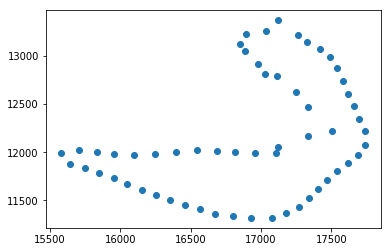

In [54]:
from matplotlib import pyplot as plt
plt.scatter(x_c, y_c)